# Подключение модулей

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [6]:
import tensorflow as tf
from tensorflow import keras

# Загрузка данных

In [8]:
df = pd.read_csv('bmw.csv')

In [9]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


### Данные содержат следующие столбцы:
- __Model:__ BMW модель автомобиля
- __Year:__ Год изготовления
- __Price:__ Указанная цена автомобиля
- __Transmission:__ Тип коробки передач (механическая, автоматическая и т.д.)
- __Mileage:__ Пройденное расстояние (в милях или километрах)
- __FuelType:__ Тип используемого топлива (бензин, дизель)
- __Tax:__ Сумма дорожного налога
- __MPG:__ Расход топлива (мили на галлон)
- __EngineSize:__ Объем двигателя в литрах

Этот набор данных чистый и хорошо структурированный, что делает его подходящим для разведочного анализа данных, визуализации и задач прогнозного моделирования, таких как прогнозирование цен на автомобили.

# Просмотр датасета

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


In [13]:
pd.set_option('display.float_format', lambda x: '%0.4f' % x)
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10781.0000,10781.0000,10781.0000,10781.0000,10781.0000,10781.0000
mean,2017.0789,22733.4089,25496.9866,131.7021,56.3990,2.1678
std,2.3490,11415.5282,25143.1926,61.5108,31.3370,0.5521
min,1996.0000,1200.0000,1.0000,0.0000,5.5000,0.0000
25%,2016.0000,14950.0000,5529.0000,135.0000,45.6000,2.0000
50%,2017.0000,20462.0000,18347.0000,145.0000,53.3000,2.0000
75%,2019.0000,27940.0000,38206.0000,145.0000,62.8000,2.0000
max,2020.0000,123456.0000,214000.0000,580.0000,470.8000,6.6000


In [14]:
categorical_cols = [col for col in df.columns if df[col].dtype == "O"]
numerical_cols = [col for col in df.columns if df[col].dtype !="O"]

def show_value_counts(df, cols):
    for col in categorical_cols:
        print('------------------')
        print(df[col].value_counts())

In [15]:
show_value_counts(df,categorical_cols)

------------------
model
 3 Series    2443
 1 Series    1969
 2 Series    1229
 5 Series    1056
 4 Series     995
 X1           804
 X3           551
 X5           468
 X2           288
 X4           179
 M4           125
 6 Series     108
 Z4           108
 7 Series     106
 X6           106
 X7            55
 i3            43
 8 Series      39
 M5            29
 M3            27
 M2            21
 i8            17
 M6             8
 Z3             7
Name: count, dtype: int64
------------------
transmission
Semi-Auto    4666
Automatic    3588
Manual       2527
Name: count, dtype: int64
------------------
fuelType
Diesel      7027
Petrol      3417
Hybrid       298
Other         36
Electric       3
Name: count, dtype: int64


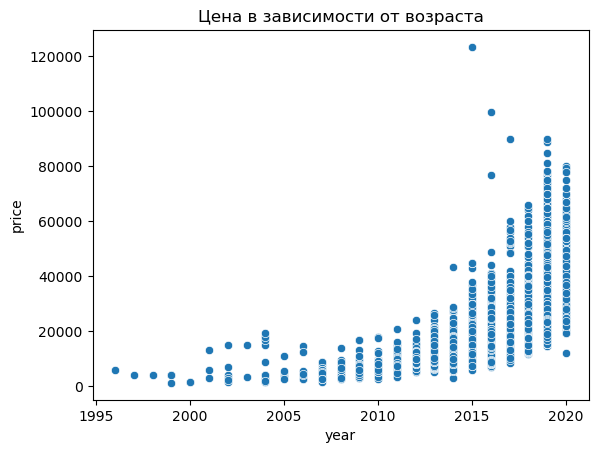

In [16]:
sns.scatterplot(data = df, x = 'year',y = 'price')
plt.title('Цена в зависимости от возраста')

plt.show()

Text(0.5, 1.0, 'Цена в зависимости от пробега')

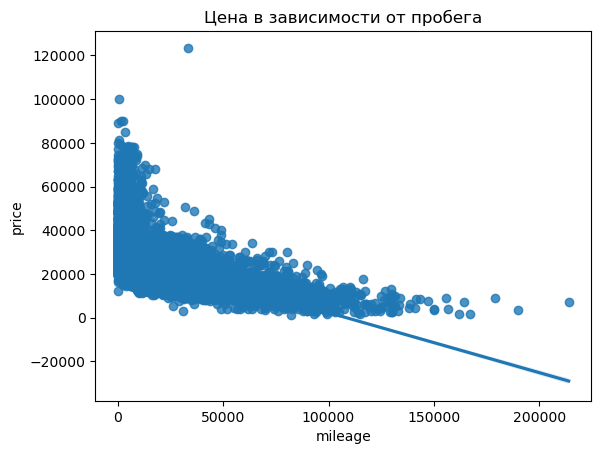

In [17]:
sns.regplot(y='price', x='mileage', data=df)
plt.title('Цена в зависимости от пробега')

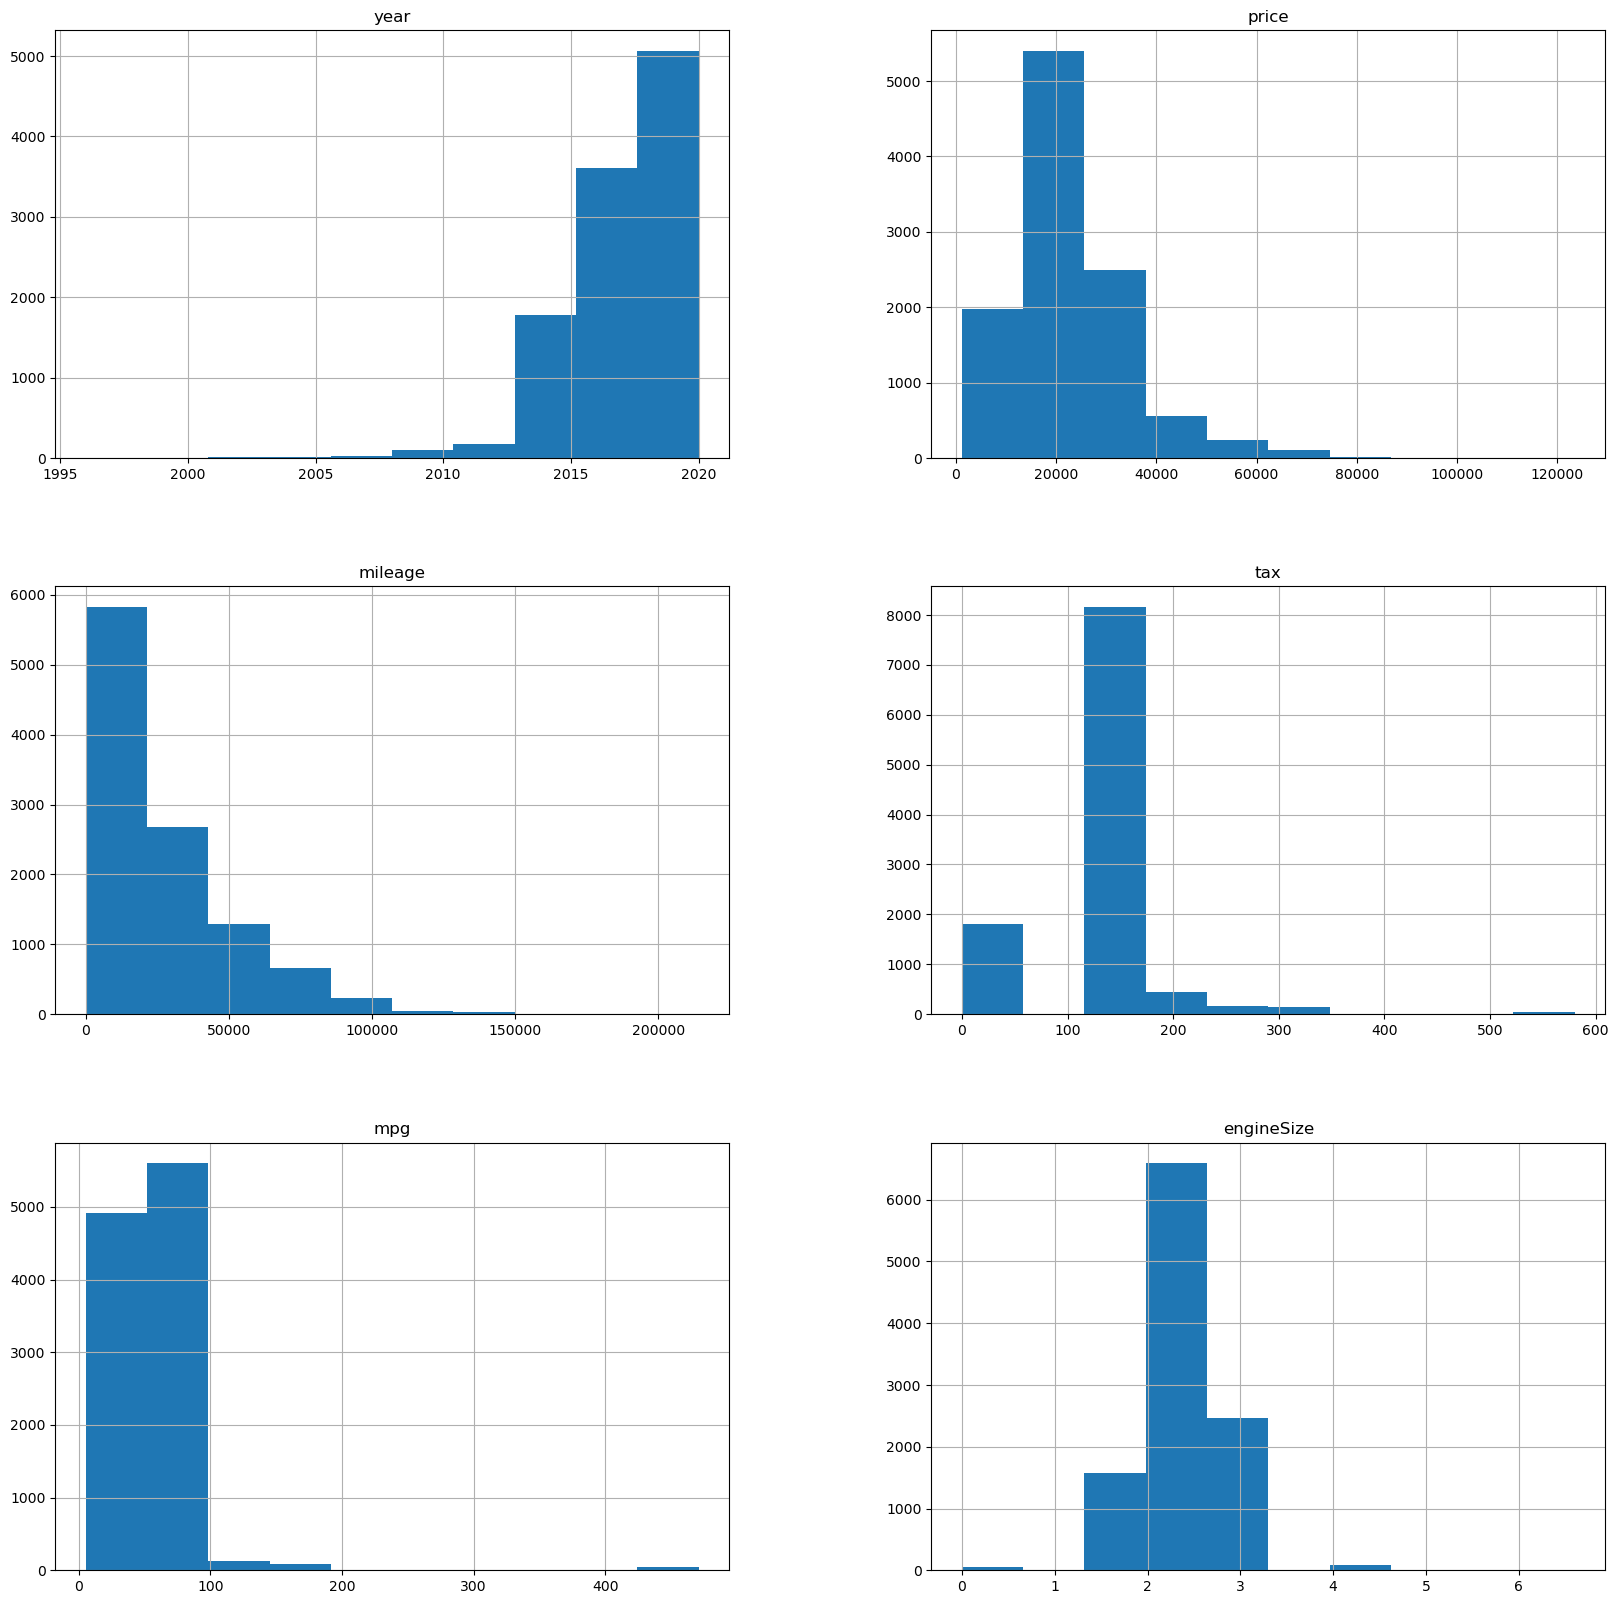

In [18]:
df.hist(figsize=(20,20));

<Figure size 800x600 with 0 Axes>

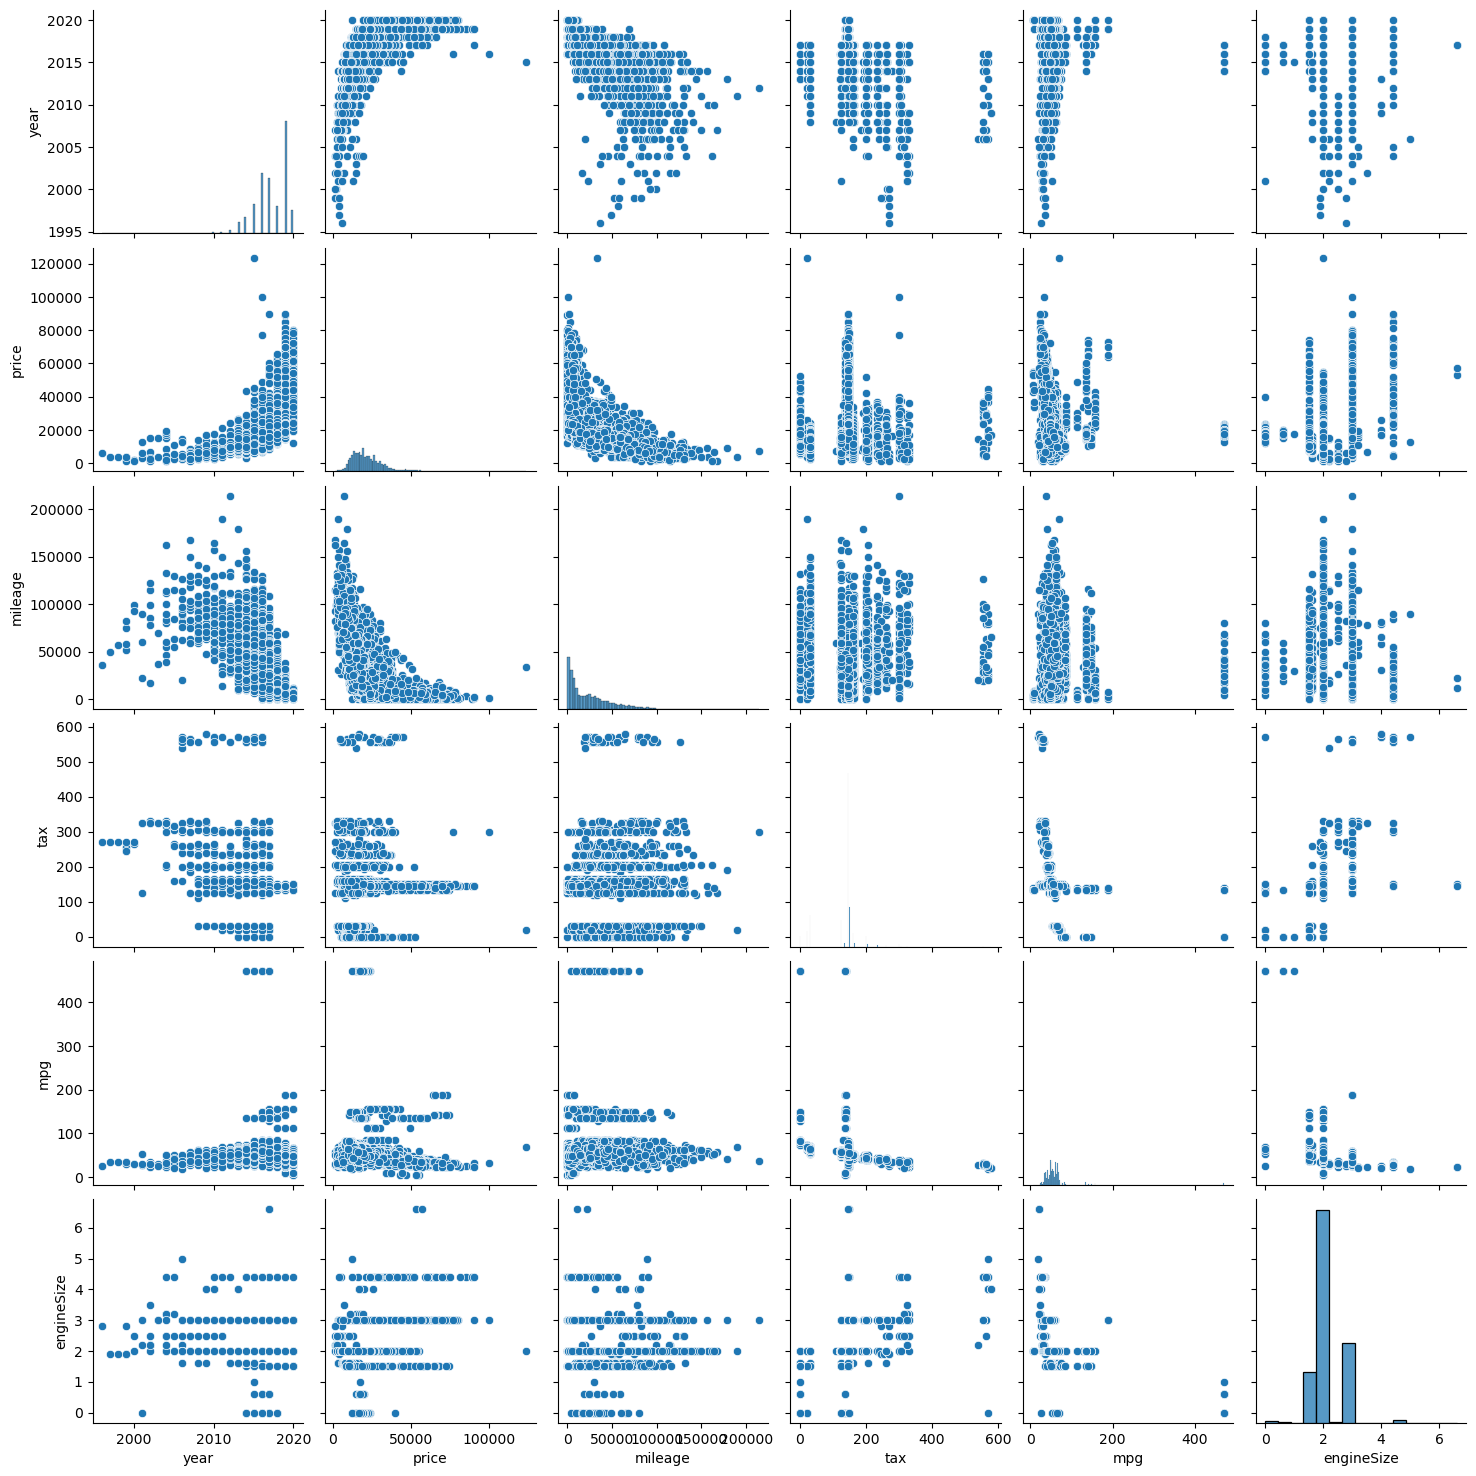

In [19]:
plt.figure(figsize=(8,6))
sns.pairplot(df)

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [21]:
df['model_encode'] = le.fit_transform(df['model'])
df['transmission_encode'] = le.fit_transform(df['transmission'])
df['fuelType_encode'] = le.fit_transform(df['fuelType'])

In [22]:
df[['model_encode', 'year', 'price', 'transmission_encode', 'mileage', 'fuelType_encode', 'tax', 'mpg', 'engineSize']].corr()


,model_encode,year,price,transmission_encode,mileage,fuelType_encode,tax,mpg,engineSize
model_encode,1.0000,0.0761,0.4679,-0.0140,-0.0848,-0.0869,0.2289,0.0096,0.2519
year,0.0761,1.0000,0.6238,0.2644,-0.7744,0.1396,0.0252,-0.0718,-0.0263
price,0.4679,0.6238,1.0000,0.2123,-0.6054,0.1069,0.2635,-0.2049,0.4602
transmission_encode,-0.0140,0.2644,0.2123,1.0000,-0.2918,0.0815,0.0757,-0.1450,0.0358
mileage,-0.0848,-0.7744,-0.6054,-0.2918,1.0000,-0.2425,-0.1707,0.1186,-0.0025
fuelType_encode,-0.0869,0.1396,0.1069,0.0815,-0.2425,1.0000,0.2917,-0.1723,-0.0491
tax,0.2289,0.0252,0.2635,0.0757,-0.1707,0.2917,1.0000,-0.3518,0.4296
mpg,0.0096,-0.0718,-0.2049,-0.1450,0.1186,-0.1723,-0.3518,1.0000,-0.3998
engineSize,0.2519,-0.0263,0.4602,0.0358,-0.0025,-0.0491,0.4296,-0.3998,1.0000


<Axes: >

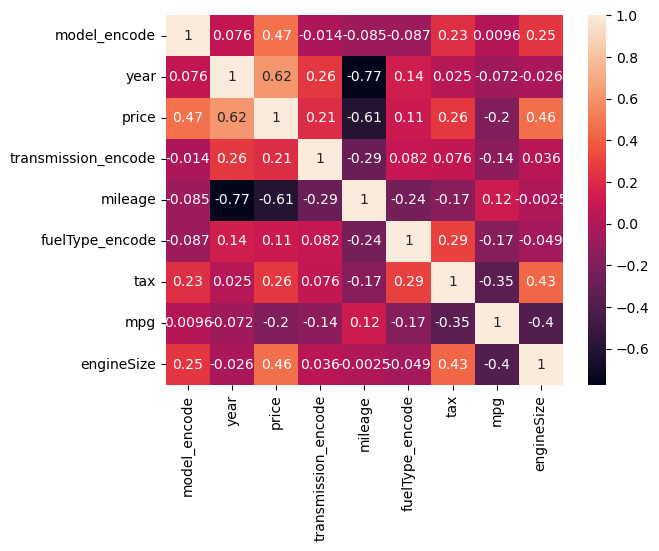

In [23]:
sns.heatmap(df[['model_encode', 'year', 'price', 'transmission_encode', 'mileage', 'fuelType_encode', 'tax', 'mpg', 'engineSize']].corr(), annot=True)

# Обучени моделей

## Обучение линейной регрессии

In [26]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'model_encode', 'transmission_encode',
       'fuelType_encode'],
      dtype='object')

In [27]:
X = df[['model_encode', 'year', 'transmission_encode', 'mileage', 'fuelType_encode', 'tax', 'mpg', 'engineSize']]
y = df['price']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

In [33]:
from sklearn.linear_model import LinearRegression
lrm = LinearRegression()
lrm.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [35]:
predictions = lrm.predict(X_test_scaled)
predictions

array([[-0.80087648],
       [-1.01711075],
       [ 1.62849787],
       ...,
       [ 0.24857375],
       [-0.47008153],
       [-1.13203451]])

<Axes: >

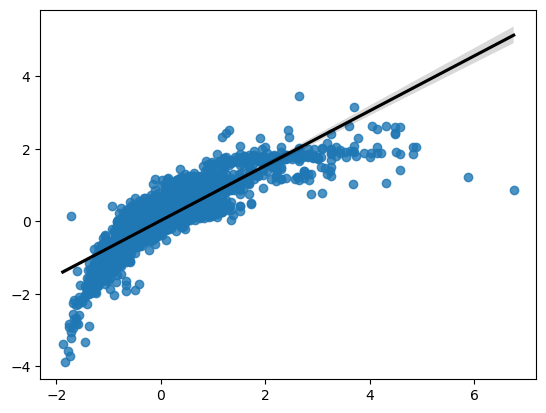

In [37]:
sns.regplot(x=y_test_scaled, y=predictions, line_kws={"color":"black"})

In [74]:
from sklearn.metrics import r2_score
# Оценка качества
r2 = r2_score(y_test_scaled, predictions)
print(f"R²: {r2:.4f}")


R²: 0.7511


Точность линейнной регрессии = 75%, но даёт высокую среднюю ошибку в ~3929.

## Обучение нейронной модели

In [47]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


X = df[['model_encode', 'year', 'transmission_encode', 'mileage', 'fuelType_encode', 'tax', 'mpg', 'engineSize']]
y = df['price']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
# Создание нейронной сети
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # регрессия → один выход
])

# Компиляция модели
model.compile(
    optimizer='adam',
    loss='mse',          
    metrics=['mae']      
)

In [51]:
# Обучение
history = model.fit(
    X_train_scaled, y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/200
189/189 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 606285888.0000 - mae: 21973.8574 - val_loss: 451996704.0000 - val_mae: 18855.8184
Epoch 2/200
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 145798560.0000 - mae: 9273.0947 - val_loss: 38808264.0000 - val_mae: 4393.1670
Epoch 3/200
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 41883548.0000 - mae: 4466.0625 - val_loss: 31427844.0000 - val_mae: 3826.1182
Epoch 4/200
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 37619080.0000 - mae: 4174.0850 - val_loss: 28105746.0000 - val_mae: 3617.9871
Epoch 5/200
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 35727620.0000 - mae: 4033.0884 - val_loss: 26387208.0000 - val_mae: 3455.7520
Epoch 6/200
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 32795844.0000 - mae: 3863.4473 - val_loss: 24631378.0000 - val_mae: 3339.3892
Epoch 7/200
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 31580896.0000 - mae: 3763.7219 - val_loss: 23969518.0000 - val_mae: 3265.1562
Epoch 8/200
189/189 ━━

In [67]:
# Получаем предсказания
y_pred_nn = model.predict(X_test_scaled).flatten()

# Оценка качества
r2 = r2_score(y_test, y_pred_nn)
mae = mean_absolute_error(y_test, y_pred_nn)

print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.2f}")

102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
R²: 0.8825
MAE: 2427.20


<Axes: >

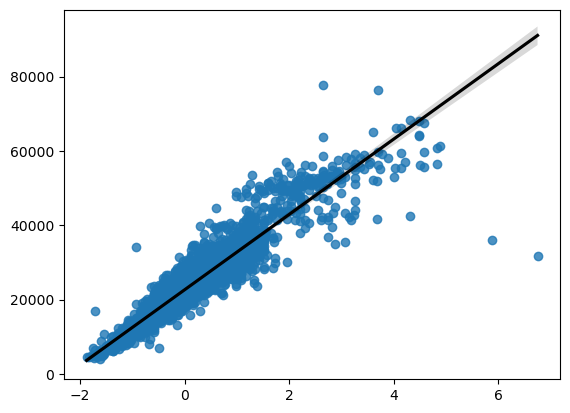

In [71]:
sns.regplot(x=y_test_scaled, y=y_pred_nn, line_kws={"color":"black"})

Точность линейнной регрессии = 88%, но даёт  среднюю ошибку в ~2427

## Сравнение моделей

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# Обучаем линейную модель на тех же данных
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)  # y_train — исходные цены!

# Предсказания
y_pred_lr = lr.predict(X_test_scaled)
y_pred_nn = model.predict(X_test_scaled).flatten()

# Важно: считаем метрики в ОРИГИНАЛЬНОЙ шкале (y_test — не масштабировано!)
r2_nn = r2_score(y_test, y_pred_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)

# Теперь выводим корректно:
print(f"Линейная регрессия: R² = {r2_lr:.4f}, MAE = {mae_lr:.2f}")
print(f"Нейросеть:          R² = {r2_nn:.4f}, MAE = {mae_nn:.2f}")

102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Линейная регрессия: R² = 0.7511, MAE = 3929.38
Нейросеть:          R² = 0.8825, MAE = 2427.20


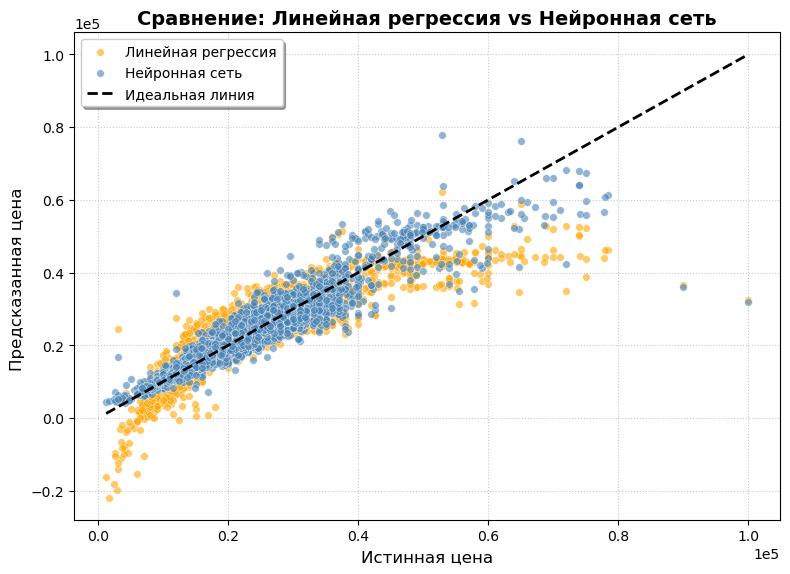

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Убедитесь, что y_test, y_pred_lr, y_pred_nn уже определены и в оригинальной шкале (в фунтах)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_lr, color='orange', alpha=0.6, label='Линейная регрессия', s=30)
sns.scatterplot(x=y_test, y=y_pred_nn, color='steelblue', alpha=0.6, label='Нейронная сеть', s=30)

# Идеальная линия (y = x)
x_line = [y_test.min(), y_test.max()]
plt.plot(x_line, x_line, 'k--', lw=2, label='Идеальная линия')

# Оформление
plt.xlabel('Истинная цена', fontsize=12)
plt.ylabel('Предсказанная цена ', fontsize=12)
plt.title('Сравнение: Линейная регрессия vs Нейронная сеть', fontsize=14, fontweight='bold')
plt.legend(frameon=True, shadow=True)
plt.grid(True, linestyle=':', alpha=0.7)

# Автоматическая настройка масштаба осей (если цены ~10⁵–10⁶)
plt.ticklabel_format(axis='both', style='sci', scilimits=(5, 5))  # показывать 1e6 вместо 1000000

plt.tight_layout()
plt.show()

## Вывод

- Линейная регрессия —  точность: R² = 0.751, а ошибка значительно выше — 3929 £, что делает её менее надёжной для прогнозирования цен.
- Нейронная сеть — лучшая модель для данной задачи регрессии. Она показала наивысшую точность с R² = 0.883 и минимальной средней абсолютной ошибкой 2427 £.
